In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Merge the two datasets on Mouse ID
merged_drug_data = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID", "Mouse ID"])

by_drug1 = merged_drug_data
by_drug2 = merged_drug_data

by_drug3 = merged_drug_data
by_drug4 = merged_drug_data

by_drug5 = merged_drug_data
by_drug6 = merged_drug_data

# Display the data table for preview
merged_drug_data.head(1)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
mean_vol_drug_time = by_drug1.groupby(["Drug", "Timepoint"]).mean()[["Tumor Volume (mm3)"]]

index_reset_mean_vol_drug_time = mean_vol_drug_time.reset_index()

# Preview DataFrame
index_reset_mean_vol_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
stderr_vol_drug_time = by_drug2.groupby(["Drug", "Timepoint"]).sem()[["Tumor Volume (mm3)"]]

index_reset_stderr_vol_drug_time = stderr_vol_drug_time.reset_index()

# Preview DataFrame
index_reset_stderr_vol_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
index_reset_mean_vol_drug_time.set_index(["Timepoint", "Drug"], inplace=True)
index_reset_stderr_vol_drug_time.set_index(["Timepoint", "Drug"], inplace=True)

In [5]:
index_reset_mean_vol_drug_time.head()

,,Tumor Volume (mm3)
Timepoint,Drug,
0,Capomulin,45.000000
5,Capomulin,44.266086
10,Capomulin,43.084291
15,Capomulin,42.064317
20,Capomulin,40.716325


In [6]:
index_reset_stderr_vol_drug_time.head()

,,Tumor Volume (mm3)
Timepoint,Drug,
0,Capomulin,0.000000
5,Capomulin,0.448593
10,Capomulin,0.702684
15,Capomulin,0.838617
20,Capomulin,0.909731


In [7]:
index_reset_mean_vol_drug_time = index_reset_mean_vol_drug_time.unstack()
stderr_vol_drug_time = stderr_vol_drug_time.unstack()

# Preview that Reformatting worked
index_reset_mean_vol_drug_time

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [8]:
num_timepoints = index_reset_mean_vol_drug_time.index

count_of_drugs = len(index_reset_mean_vol_drug_time.columns)

times = [time for time in num_timepoints]

vol_per_drug = [index_reset_mean_vol_drug_time.iloc[:, i]
           for i in range(0, count_of_drugs)]

def drug_iterated(i):
    return vol_per_drug[i].name[1]
    
def vol_iterated(i):
    return vol_per_drug[i]

In [9]:
x_limit = num_timepoints[-1] + 5
x_axis = np.arange(0, x_limit, 5)

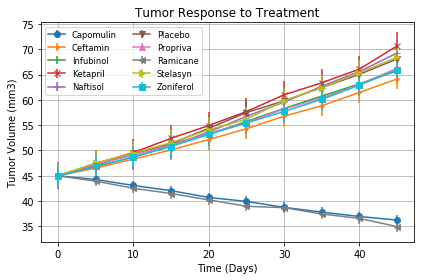

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
marker_options = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

for y in range(0, count_of_drugs):
    ax.errorbar(x_axis, vol_iterated(y), alpha=1, yerr=stats.sem(vol_iterated(y)), fmt = marker_options[y] + "-", label=f"{drug_iterated(y)}")
    ax.legend()
                
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

ax.legend(loc="best", fontsize="small", fancybox=True, ncol=2)

plt.grid()

plt.tight_layout()

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

# Show plot
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_meta_drug_time = by_drug3.groupby(["Drug", "Timepoint"]).mean()[["Metastatic Sites"]]

index_reset_mean_meta_drug_time = mean_meta_drug_time.reset_index()

# Preview DataFrame
index_reset_mean_meta_drug_time.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
stderr_meta_drug_time = by_drug4.groupby(["Drug", "Timepoint"]).sem()[["Metastatic Sites"]]

index_reset_stderr_meta_drug_time = stderr_meta_drug_time.reset_index()

# Preview DataFrame
index_reset_stderr_meta_drug_time.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
index_reset_mean_meta_drug_time.set_index(["Timepoint", "Drug"], inplace=True)
index_reset_stderr_meta_drug_time.set_index(["Timepoint", "Drug"], inplace=True)

In [14]:
index_reset_mean_meta_drug_time.head()

,,Metastatic Sites
Timepoint,Drug,
0,Capomulin,0.000000
5,Capomulin,0.160000
10,Capomulin,0.320000
15,Capomulin,0.375000
20,Capomulin,0.652174


In [15]:
index_reset_stderr_meta_drug_time.head()

,,Metastatic Sites
Timepoint,Drug,
0,Capomulin,0.000000
5,Capomulin,0.074833
10,Capomulin,0.125433
15,Capomulin,0.132048
20,Capomulin,0.161621


In [16]:
index_reset_mean_meta_drug_time = index_reset_mean_meta_drug_time.unstack()
stderr_meta_drug_time = index_reset_stderr_meta_drug_time.unstack()

# Preview that Reformatting worked
index_reset_mean_meta_drug_time

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [17]:
num_timepoints_meta = index_reset_mean_meta_drug_time.index

count_of_drugs_meta = len(index_reset_mean_meta_drug_time.columns)

times_meta = [meta_time for meta_time in num_timepoints_meta]
meta_per_drug = [index_reset_mean_meta_drug_time.iloc[:, i]
           for i in range(0, count_of_drugs_meta)]

def drug_iterated_meta(i):
    return meta_per_drug[i].name[1]
    
def vol_iterated_meta(i):
    return meta_per_drug[i]

In [18]:
x_limit = num_timepoints_meta[-1] + 5
x_axis = np.arange(0, x_limit, 5)

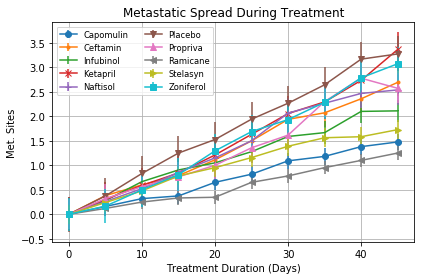

In [19]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
marker_options = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

for y in range(0, count_of_drugs_meta):
    ax.errorbar(x_axis, vol_iterated_meta(y), alpha=1, yerr=stats.sem(vol_iterated_meta(y)), fmt = marker_options[y] + "-", label=f"{drug_iterated_meta(y)}")
    ax.legend()
                
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

ax.legend(loc="best", fontsize="small", fancybox=True, ncol=2)
plt.grid()

plt.tight_layout()

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

# Show plot
plt.show()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count_drug_time = by_drug5.groupby(["Drug", "Timepoint"]).count()[["Mouse ID"]]

index_reset_mouse_count_drug_time = mice_count_drug_time.reset_index()

# Preview DataFrame
index_reset_mouse_count_drug_time.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
index_reset_mouse_count_drug_time.set_index(["Timepoint", "Drug"], inplace=True)
index_reset_mouse_count_drug_time = index_reset_mouse_count_drug_time.unstack()

# Preview the Data Frame
index_reset_mouse_count_drug_time

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [22]:
num_timepoints_mice = index_reset_mouse_count_drug_time.index

count_of_drugs_mice = len(index_reset_mouse_count_drug_time.columns)

times_mice = [mouse_time for mouse_time in num_timepoints_mice]
mouse_count = [index_reset_mouse_count_drug_time.iloc[:, i]
           for i in range(0, count_of_drugs_mice)]

def drug_iterated_mouse(i):
    return mouse_count[i].name[1]
    
def vol_iterated_mouse(i):
    return mouse_count[i] / mouse_count[i].max() * 100

In [23]:
x_limit = num_timepoints_mice[-1] + 5
x_axis = np.arange(0, x_limit, 5)

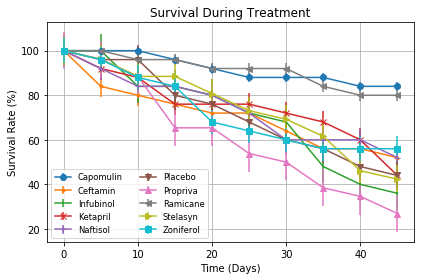

In [24]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
marker_options = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

for y in range(0, count_of_drugs_mice):
    ax.errorbar(x_axis, vol_iterated_mouse(y), alpha=1, yerr=stats.sem(vol_iterated_mouse(y)), fmt = marker_options[y] + "-", label=f"{drug_iterated_mouse(y)}")
    ax.legend()
                
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

ax.legend(loc="best", fontsize="small", fancybox=True, ncol=2)
plt.grid()

plt.tight_layout()

# Save the Figure
plt.savefig("Survival_During_Treatment.png")

# Show plot
plt.show()

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
percent = index_reset_mean_vol_drug_time

In [26]:
num_timepoints_perc = percent.index
num_max = num_timepoints_perc.max()
num_min = num_timepoints_perc.min()

count_of_drugs_perc = len(percent.columns)

drug_name_list = []
percent_change_list = []

times_mice_per = [perc for perc in num_timepoints_perc]
vol_change_drug = [percent.iloc[:, i]
           for i in range(0, count_of_drugs_perc)]

def drug_iterated_perc(i):
    d_name = vol_change_drug[i].name[1]
    drug_name_list.append(d_name)
    
def drug_iterated_change(i):
    perc_change = ((vol_change_drug[i][num_max] - vol_change_drug[i][num_min]) / vol_change_drug[i][num_min] * 100)
    percent_change_list.append(perc_change)
    

for y in range(0, count_of_drugs_perc):
    drug_iterated_perc(y)
    drug_iterated_change(y)

percent_change_df = pd.DataFrame({"Drug":drug_name_list, "% Change":percent_change_list})
percent_change_df

percent_sorted_df = percent_change_df.sort_values(by="% Change", ascending=True)

In [27]:
sorted_drug_list = list(percent_sorted_df.loc[:, "Drug"])
sorted_percent_list = list(percent_sorted_df.loc[:, "% Change"])

In [28]:
x_axis = np.arange(len(percent_change_list))

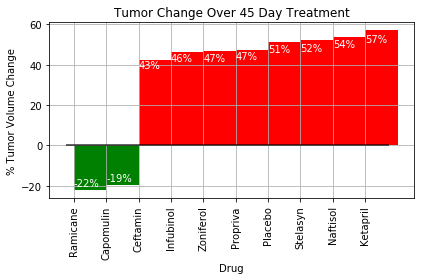

In [29]:
fig, ax = plt.subplots()

for y in range(0, count_of_drugs_perc):
    if sorted_percent_list[y] < 0:
        bars_1 = ax.bar(x_axis[y], sorted_percent_list[y], width=1, color="g", alpha=1, align="edge")
        ax.text(y, sorted_percent_list[y] * 0.9, f"{round(sorted_percent_list[y])}%", color="w", horizontalalignment="left")
        
    if sorted_percent_list[y] > 0:
        bars_2 = ax.bar(x_axis[y], sorted_percent_list[y], width=1, color="r", alpha=1, align="edge")
        ax.text(y, sorted_percent_list[y] * 0.9, f"{round(sorted_percent_list[y])}%", color="w", horizontalalignment="left")

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sorted_drug_list, rotation="vertical")
plt.hlines(0, -0.25, 9.75, alpha=0.8)

plt.grid()

plt.tight_layout()

plt.savefig("Tumor_Size_Over_Treatment.png")

plt.show()